<a href="https://colab.research.google.com/github/marilikalantzi/datajour/blob/main/Final_project3_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 49.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
full_articles_df = pd.read_csv("/content/gdrive/MyDrive/Τελική εργασία σεμινάριο/report1c.csv")

In [ ]:
len(full_articles_df)

1315

In [ ]:
full_articles_df.tail(1)

,source,title,date,full_text
1314,skai.gr,"Πόλωση, επιθέσεις, διαδηλώσεις: Oι «γερμανικές...",2024-06-09 17:51:00,"Πόλωση, επιθέσεις, διαδηλώσεις: Oι «γερμανικές..."


In [ ]:
df = full_articles_df[['date','full_text' ]]
df = df.rename(columns={'full_text': 'text'} )

In [ ]:
df.head(1)

,date,text
0,2024-06-09 23:59:17,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...


In [ ]:
df.dtypes

date    object
text    object
dtype: object

In [ ]:
#Αλλαξα το format για να ταιριάζει με το date format του data μου

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.dtypes

date    datetime64[ns]
text            object
dtype: object

In [ ]:
df['text'] = df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(1315, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
1314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
1314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].sum(axis=1)

0       13
1        4
2        0
3       21
4        1
        ..
1310     6
1311     3
1312     1
1313    10
1314     3
Length: 1315, dtype: int64

In [ ]:
df.head(3)

,date,text
0,2024-06-09 23:59:17,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...
1,2024-06-09 23:59:00,Παραιτείται ο πρωθυπουργός του Βελγίου μετά τα...
2,2024-06-09 23:58:51,Ευρωεκλογές 2024: Ποιο είναι το Κόμμα Ισότητας...


In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positive'] = wordcount_df[positive_words].sum(axis=1)

df['joy'] = wordcount_df[joy_words].sum(axis=1)

df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)

df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
df.head()

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-06-09 23:59:17,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...,5,21,2,1,2,13,4,4,10,4
1,2024-06-09 23:59:00,Παραιτείται ο πρωθυπουργός του Βελγίου μετά τα...,0,4,0,2,1,4,2,2,5,1
2,2024-06-09 23:58:51,Ευρωεκλογές 2024: Ποιο είναι το Κόμμα Ισότητας...,1,2,0,3,0,0,1,3,5,1
3,2024-06-09 23:58:30,Κουτσούμπας: Το ΚΚΕ καταγράφει ακόμα μία σημαν...,21,26,8,10,7,21,10,7,24,16
4,2024-06-09 23:58:21,Ευρωεκλογές: Ποιοι υποψήφιοι των κομμάτων προη...,1,3,1,0,0,1,1,1,1,1


In [ ]:
df.reset_index(inplace=True)
df.set_index('date', inplace=True)
df.head(5)

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2024-06-09 23:59:17,0,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...,5,21,2,1,2,13,4,4,10,4
2024-06-09 23:59:00,1,Παραιτείται ο πρωθυπουργός του Βελγίου μετά τα...,0,4,0,2,1,4,2,2,5,1
2024-06-09 23:58:51,2,Ευρωεκλογές 2024: Ποιο είναι το Κόμμα Ισότητας...,1,2,0,3,0,0,1,3,5,1
2024-06-09 23:58:30,3,Κουτσούμπας: Το ΚΚΕ καταγράφει ακόμα μία σημαν...,21,26,8,10,7,21,10,7,24,16
2024-06-09 23:58:21,4,Ευρωεκλογές: Ποιοι υποψήφιοι των κομμάτων προη...,1,3,1,0,0,1,1,1,1,1


<Axes: ylabel='date'>

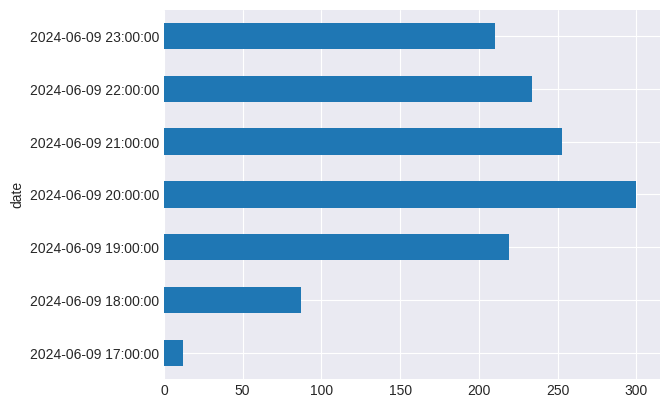

In [ ]:
df['text'].resample('H').count().plot(kind='barh') #πληθος αρθων ανα ώρα

<Axes: xlabel='date'>

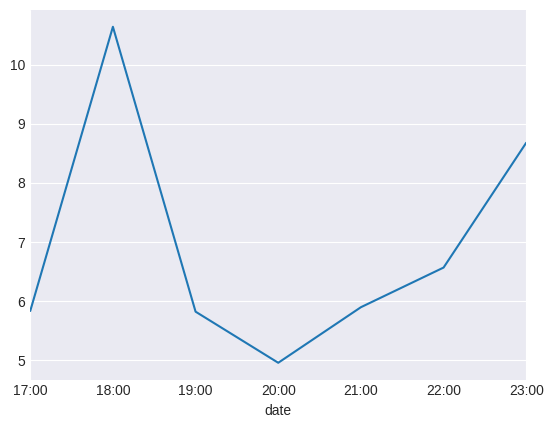

In [ ]:
df['positive'].resample('H').mean().plot() #θετικότητα αρθων ανα ώρα

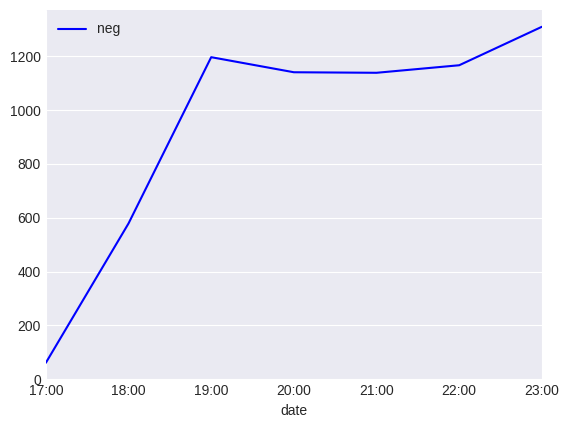

In [ ]:
df['negative'].resample('H').sum().plot(color = 'b',label = 'neg').legend() #αρνητικότητα αρθων ανα ώρα

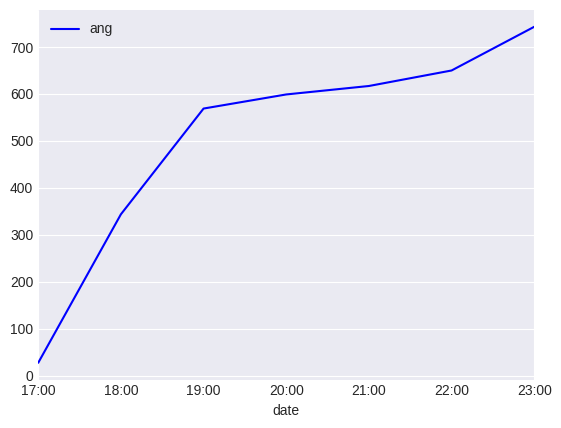

In [ ]:
df['anger'].resample('H').sum().plot(color = 'b',label = 'ang').legend()

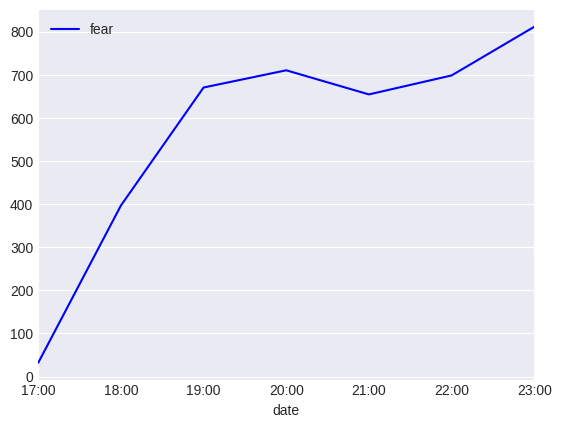

In [ ]:
df['fear'].resample('H').sum().plot(color = 'b',label = 'fear').legend()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

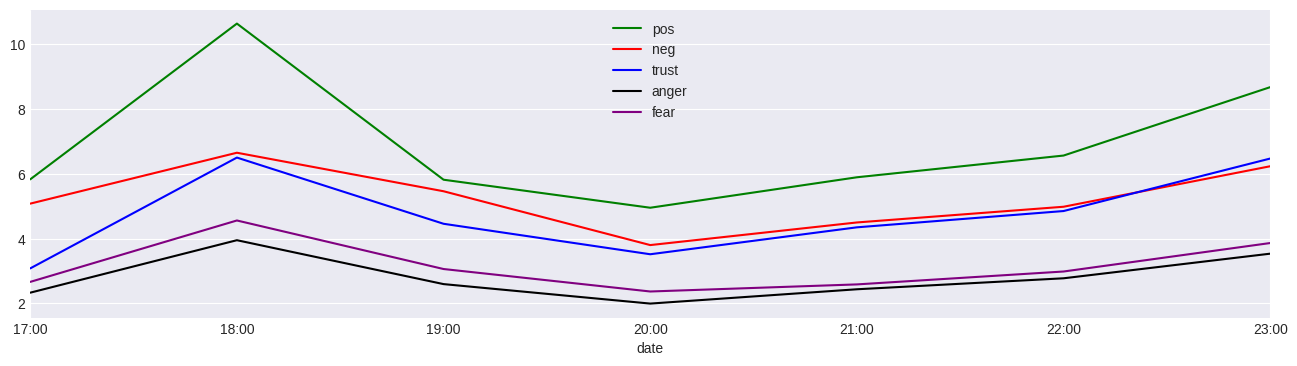

In [ ]:
ax = df['positive'].resample('H').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
df['negative'].resample('H').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
df['trust'].resample('H').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
#df['anticipation'].resample('H').mean().plot(figsize=(16,4), ax = ax,
                                                #label = 'anticipation',color = 'brown').legend()
df['anger'].resample('H').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'anger',color = 'black').legend()
df['fear'].resample('H').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'fear',color = 'purple').legend()


In [ ]:
#Συγκριση αρνητικότητας-θετικότητασ

<Axes: xlabel='date'>

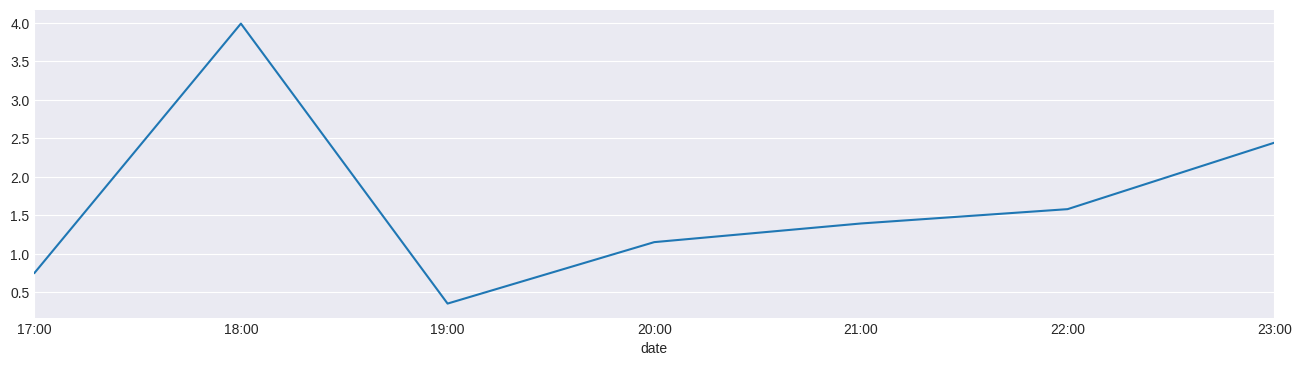

In [ ]:
df['pos/neg'] = df['positive'] - df['negative']
df['pos/neg'].resample('H').mean().plot(figsize=(16,4))

<Axes: xlabel='date'>

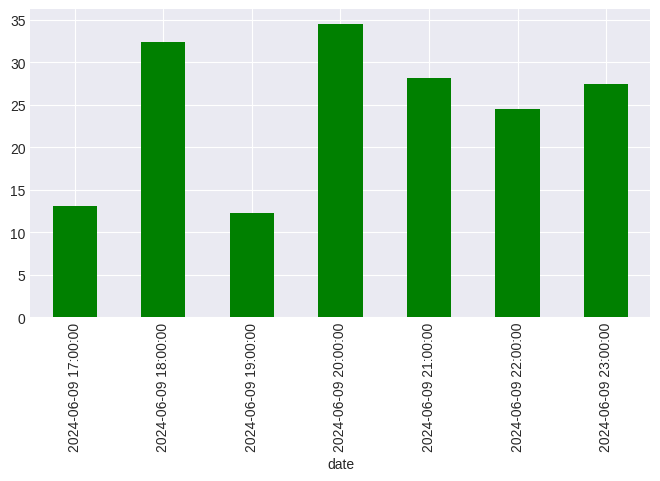

In [ ]:
df['(-)αρνητικότητα | θετικότητα(+)'] = df.positive*100//df[['positive','negative']].sum(
        axis=1) - df.negative*100//df[['positive','negative']].sum(axis=1)

df['(-)αρνητικότητα | θετικότητα(+)'].resample('H').mean().plot(kind='bar',
                                                                               color=(df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))


In [ ]:
df[(df['(-)αρνητικότητα | θετικότητα(+)'] == df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (df['(-)αρνητικότητα | θετικότητα(+)'] == df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][[ 'index','positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2024-06-09 23:57:00,12,0,3,-100.0
2024-06-09 23:53:52,28,1,0,100.0
2024-06-09 23:53:00,30,2,0,100.0
2024-06-09 23:48:00,39,1,0,100.0
2024-06-09 23:39:00,84,0,2,-100.0
...,...,...,...,...
2024-06-09 18:21:59,1282,13,0,100.0
2024-06-09 18:17:56,1284,6,0,100.0
2024-06-09 18:01:11,1299,2,0,100.0


In [ ]:
#len(df)

In [ ]:
full_articles_df.loc[[12,28], ['source','title', 'full_text']]

,source,title,full_text
12,skai.gr,Βέλγιο: Παραιτείται ο πρωθυπουργός Αλεξάντερ Ν...,Βέλγιο: Παραιτείται ο πρωθυπουργός Αλεξάντερ Ν...
28,ethnos.gr,Αποτελέσματα ευρωεκλογών 2024: Πρώτη φέτος η.....,Αποτελέσματα ευρωεκλογών 2024: Πρώτη φέτος η.....


In [ ]:
#full_articles_df.loc[[11,27], ['source','title', 'full_text']]

In [ ]:
#print(df.columns)

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.7.0/el_core_news_sm-3.7.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['ποτέ',
 'ετούτο',
 'κατ',
 'στη',
 'τέτοιας',
 'όταν',
 'αυτήν',
 'μόνων',
 'μέχρι',
 'απ',
 'αρκετές',
 'ετούτη',
 'οσουσδήποτε',
 'οποιασδήποτε',
 'πρωτύτερα',
 'τούτα',
 'πάρα',
 'όσο',
 'αυτά',
 'ολονέν']

In [ ]:
full_articles_df.head(1)

,source,title,date,full_text
0,tovima.gr,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...,2024-06-09 23:59:17,Ευρωεκλογές 2024: Παραμένουν στην τρίτη θέση π...


In [ ]:
text1 = full_articles_df.loc[12, 'full_text']
text2 = full_articles_df.loc[28, 'full_text']

In [ ]:
doc = nlp(full_articles_df['full_text'][12])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Βέλγιο Βέλγιο
: :
Παραιτείται Παραιτείται
ο ο
πρωθυπουργός πρωθυπουργός
Αλεξάντερ Αλεξάντερ
Ντε Ντε
Κρο Κρο
μετά μετά
την ο
ήττα ήττα
στις σε ο
εκλογές εκλογή
« «
Αύριο αύριος
θα θα
παραιτηθώ παραιτηθώ
από από
την ο
πρωθυπουργία πρωθυπουργία
» »
, ,
ανακοίνωσε ανακοινώνω
ο ο
Ντε Ντε
Κρό Κρό

 

Ο ο
πρωθυπουργός πρωθυπουργός
του ο
Βελγίου Βελγίου
, ,
Alexander Alexander
DeCroo DeCroo
, ,
ανακοίνωσε ανακοινώνω
την ο
παραίτησή παραίτηση
του μου
μετά μετά
την ο
ήττα ήττα
του ο
κόμματός κόμματός
του μου
, ,
των ο
Φλαμανδών Φλαμανδών
Φιλελευθέρων Φιλελευθέρων
και και
Δημοκρατών Δημοκρατών
( (
Open Open
Vld Vld
) )
, ,
στις σε ο
ευρωεκλογές ευρωεκλογή
. .

 

« «
Αύριο Αύριο
θα θα
παραιτηθώ παραιτηθώ
από από
την ο
πρωθυπουργία πρωθυπουργία
» »
, ,
ανακοίνωσε ανακοινώνω
ο ο
Ντε Ντε
Κρό Κρό
. .

 

Διαβάστε Διαβάστε
τις ο

 

Ειδήσεις ειδήσεις
σήμερα σήμερα

 

και και
ενημερωθείτε ενημερωθείτε
για για
τα ο
πρόσφατα πρόσφατα
νέα νέος
. .

 

Ακολουθήστε Ακολουθήστε
το ο

 

Skai.gr Skai.gr
στο 

In [ ]:
text1

'Βέλγιο: Παραιτείται ο πρωθυπουργός Αλεξάντερ Ντε Κρο μετά την ήττα στις εκλογές «Αύριο θα παραιτηθώ από την πρωθυπουργία», ανακοίνωσε ο Ντε Κρό\nΟ πρωθυπουργός του Βελγίου, Alexander DeCroo , ανακοίνωσε την παραίτησή του μετά την ήττα του κόμματός του, των Φλαμανδών Φιλελευθέρων και Δημοκρατών (Open Vld), στις ευρωεκλογές.\n«Αύριο θα παραιτηθώ από την πρωθυπουργία», ανακοίνωσε ο Ντε Κρό.\nΔιαβάστε τις\nΕιδήσεις σήμερα\nκαι ενημερωθείτε για τα πρόσφατα νέα.\nΑκολουθήστε το\nSkai.gr στο Google News\nκαι μάθετε πρώτοι όλες τις ειδήσεις.'

In [ ]:
' '.join(token.lemma_ for token in doc)

'Βέλγιο : Παραιτείται ο πρωθυπουργός Αλεξάντερ Ντε Κρο μετά ο ήττα σε ο εκλογή « αύριος θα παραιτηθώ από ο πρωθυπουργία » , ανακοινώνω ο Ντε Κρό \n ο πρωθυπουργός ο Βελγίου , Alexander DeCroo , ανακοινώνω ο παραίτηση μου μετά ο ήττα ο κόμματός μου , ο Φλαμανδών Φιλελευθέρων και Δημοκρατών ( Open Vld ) , σε ο ευρωεκλογή . \n « Αύριο θα παραιτηθώ από ο πρωθυπουργία » , ανακοινώνω ο Ντε Κρό . \n Διαβάστε ο \n ειδήσεις σήμερα \n και ενημερωθείτε για ο πρόσφατα νέος . \n Ακολουθήστε ο \n Skai.gr σε ο Google News \n και μάθετε πρώτος όλος ο είδηση .'

In [ ]:
text2

'Αποτελέσματα ευρωεκλογών 2024: Πρώτη φέτος η... αποχή - Σε ποιους νομούς ξεπέρασε το 60% ???? χρόνος ανάγνωσης: 1 λεπτό \xa0 ┋ \xa0 ????️\nΑνοικτό για σχολιασμό\nΣτις\nευρωεκλογές 2024\nπρώτη με διαφορά αναδείχθηκε η...\nαποχή\nπου «άγγιξε» το\n60\n% συνολικά, σε όλη την Ελλάδα.\nΜάλιστα, σχεδόν σε όλους τους νομούς, μεμονωμένα,\nξεπέρασε το 50\n%, μεταδίδει η ΕΡΤ.\nΠρωταθλήτρια\nτης αποχής αναδείχθηκε η\nΦλώρινα\nμε ποσοστό 74,61% και ακολουθεί ο νομός\nΚεφαλληνίας\nμε ποσοστό 72,06% και ο νομός\nΛακωνίας\nμε ποσοστό 70,55%.\nΟι νομοί με τη μεγαλύτερη αποχή'

In [ ]:
full_doc = nlp(text1)

In [ ]:
clear_text1 = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text1[200:400]

'νω ο παραίτηση μου μετά ο ήττα ο κόμματός μου , ο Φλαμανδών Φιλελευθέρων και Δημοκρατών ( Open Vld ) , σε ο ευρωεκλογή . \n « Αύριο θα παραιτηθώ από ο πρωθυπουργία » , ανακοινώνω ο Ντε Κρό . \n Διαβάστε'

In [ ]:
custom_stopwords = ['ακομα','ακομη','αλλα','αλλες','αλλη','αλλης','αλλων','αν','ανα','αναμεσα','απ','απο','αρα','αραγε','αργα','αρκετα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφου','γι','για','γιατι','δα','δε','δει','δεινα','δεν','δηλαδη','δι','δια','διοτι','δις','διχως','εαν','ειδεμη','ειθε','ειπαν','ειπε','εις','ειτε','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','ενωπιον','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επιπλεον','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευθυς','εφεξης','εχθες','εχτες','εχω','εως','η','ηδη','ητοι','ηττον','θα','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','καμια','καμιαν','καμιας','καν','κανεν','κανενα','κανεναν','κανενας','κανενος','κανετε','κανουμε','κανουν','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατι','κατιτι','κατοπιν','κατω','κι','κιολας','κλπ','κοντα','κτλ','κυριως','λογω','λοιπα','λοιπον','μα','μας','μαζι','μακαρι','μαλιστα','μαλλον','μας','με','μεθαυριο','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μεσω','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μονομιας','μου','να','ναι','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολοι','ολον','ολονεν','ολος','ολου','ολους','ολων','ολως','ολωσδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιασδηποτε','οποιδηποτε','οποιες','οποιεσδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοσδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουσδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεσδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσησδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοσδηποτε','οσου','οσουδηποτε','οσους','οσουσδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','παντα','παντοτε','παντου','παντως','παρ','παρα','πει','περα','περι','περιπου','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολλα','πολυ','ποσες','ποση','ποσην','ποσης','ποσο','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειται','προς','προτου','προχθες','προχτες','πρωτα','πρωτη','πρωτης','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συν','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο','ταυτον','ταυτος','ταυτου','ταυτοχρονα','ταυτων','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','χθες','χτες','χωρις','ψηλα','ω','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ']

In [ ]:
nlp.Defaults.stop_words |= {"ευρωεκλογές","ευρωβουλή","πολιτικός","κόμμα","πολιτική"}

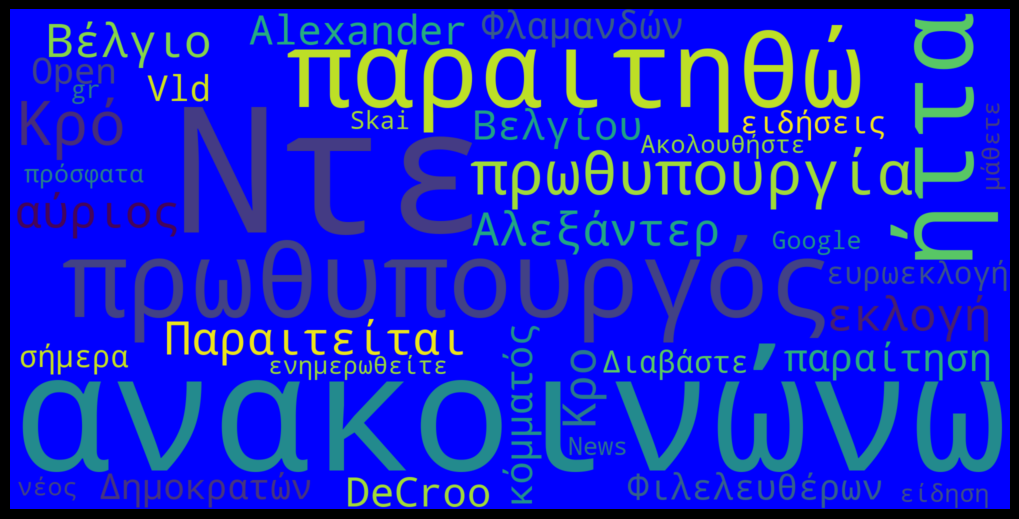

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'blue'
 ).generate(clear_text1)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
full_doc = nlp(text2)

In [ ]:
custom_stopwords = ['ακομα','ακομη','αλλα','αλλες','αλλη','αλλης','αλλων','αν','ανα','αναμεσα','απ','απο','αρα','αραγε','αργα','αρκετα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφου','γι','για','γιατι','δα','δε','δει','δεινα','δεν','δηλαδη','δι','δια','διοτι','δις','διχως','εαν','ειδεμη','ειθε','ειπαν','ειπε','εις','ειτε','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','ενωπιον','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επιπλεον','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευθυς','εφεξης','εχθες','εχτες','εχω','εως','η','ηδη','ητοι','ηττον','θα','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','καμια','καμιαν','καμιας','καν','κανεν','κανενα','κανεναν','κανενας','κανενος','κανετε','κανουμε','κανουν','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατι','κατιτι','κατοπιν','κατω','κι','κιολας','κλπ','κοντα','κτλ','κυριως','λογω','λοιπα','λοιπον','μα','μας','μαζι','μακαρι','μαλιστα','μαλλον','μας','με','μεθαυριο','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μεσω','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μονομιας','μου','να','ναι','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολοι','ολον','ολονεν','ολος','ολου','ολους','ολων','ολως','ολωσδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιασδηποτε','οποιδηποτε','οποιες','οποιεσδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοσδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουσδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεσδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσησδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοσδηποτε','οσου','οσουδηποτε','οσους','οσουσδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','παντα','παντοτε','παντου','παντως','παρ','παρα','πει','περα','περι','περιπου','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολλα','πολυ','ποσες','ποση','ποσην','ποσης','ποσο','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειται','προς','προτου','προχθες','προχτες','πρωτα','πρωτη','πρωτης','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συν','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο','ταυτον','ταυτος','ταυτου','ταυτοχρονα','ταυτων','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','χθες','χτες','χωρις','ψηλα','ω','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ']

In [ ]:
clear_text2 = ' '.join(token.lemma_ for token in full_doc)
clear_text2

'Αποτελέσματα ευρωεκλογός 2024 : Πρώτη φέτος ο ... αποχή - σε ποιους νομός ξεπέρασε ο 60% ? ? ? ? χρόνος ανάγνωση : 1 λεπτό \xa0  ┋ \xa0  ? ? ? ? ️ \n Ανοικτός για σχολιασμός \n Σε ο \n ευρωεκλογή 2024 \n πρώτος με διαφορά αναδείχθηκε ο ... \n αποχή \n που « άγγιξε » ο \n 60 \n % συνολικά , σε όλος ο Ελλάδα . \n μάλιστα , σχεδόν σε όλος ο νομός , μεμονωμένα , \n ξεπέρασε ο 50 \n % , μεταδίδω ο ΕΡΤ . \n πρωταθλήτρια \n ο αποχή αναδείχθηκε ο \n Φλώρινα \n με ποσοστό 74,61% και ακολουθώ ο νομός \n Κεφαλληνίας \n με ποσοστό 72,06% και ο νομός \n Λακωνία \n με ποσοστό 70,55%. \n ο νομός με ο μεγάλος αποχή'

In [ ]:
clear_text2[200:400]

' με διαφορά αναδείχθηκε ο ... \n αποχή \n που « άγγιξε » ο \n 60 \n % συνολικά , σε όλος ο Ελλάδα . \n μάλιστα , σχεδόν σε όλος ο νομός , μεμονωμένα , \n ξεπέρασε ο 50 \n % , μεταδίδω ο ΕΡΤ . \n πρωταθλήτρια '

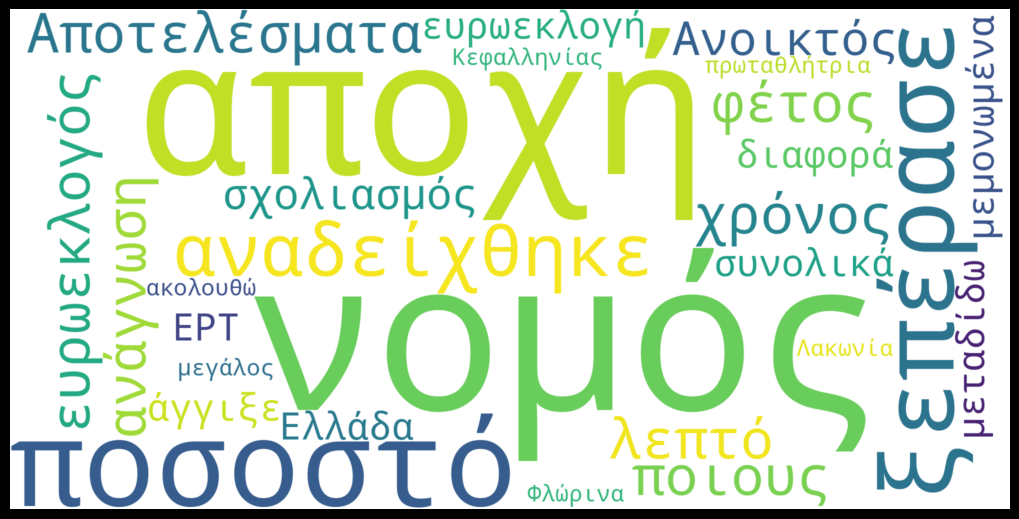

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(clear_text2)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()